# Random Forests
This notebook demonstrates Random Forest classification on a Wine quality from UCI machine learning repository.

In [6]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

## Load and Prepare the Data

In [10]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

# variable information 
pd.set_option('display.max_rows', 13)
pd.set_option('display.width', 1000)
print(wine_quality.variables) 

                    name     role         type demographic             description units missing_values
0          fixed_acidity  Feature   Continuous        None                    None  None             no
1       volatile_acidity  Feature   Continuous        None                    None  None             no
2            citric_acid  Feature   Continuous        None                    None  None             no
3         residual_sugar  Feature   Continuous        None                    None  None             no
4              chlorides  Feature   Continuous        None                    None  None             no
5    free_sulfur_dioxide  Feature   Continuous        None                    None  None             no
6   total_sulfur_dioxide  Feature   Continuous        None                    None  None             no
7                density  Feature   Continuous        None                    None  None             no
8                     pH  Feature   Continuous        None      

Even though the quality description says it ranges from 0 to 10, but it only contains data from 3 to 9


In [49]:
# unique values of the target variable
print(np.unique(y)) 

[3 4 5 6 7 8 9]


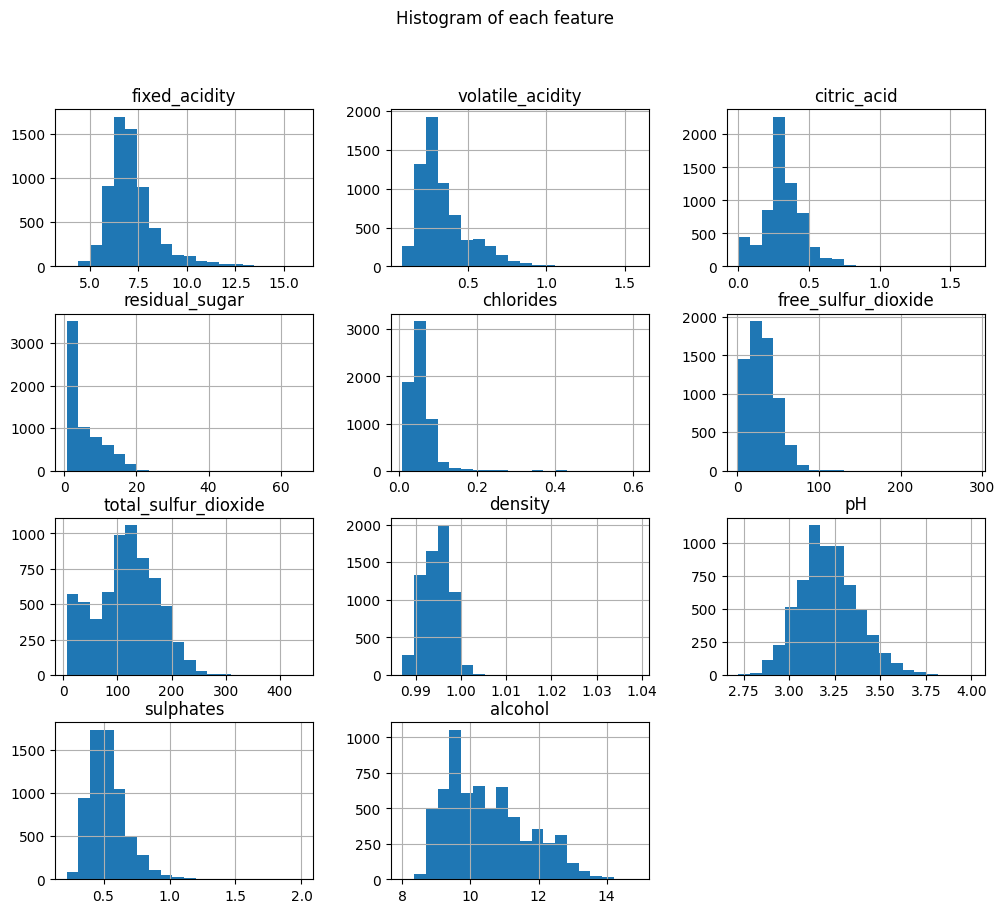

In [11]:
# histogram of each feature
X.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogram of each feature')
plt.show()


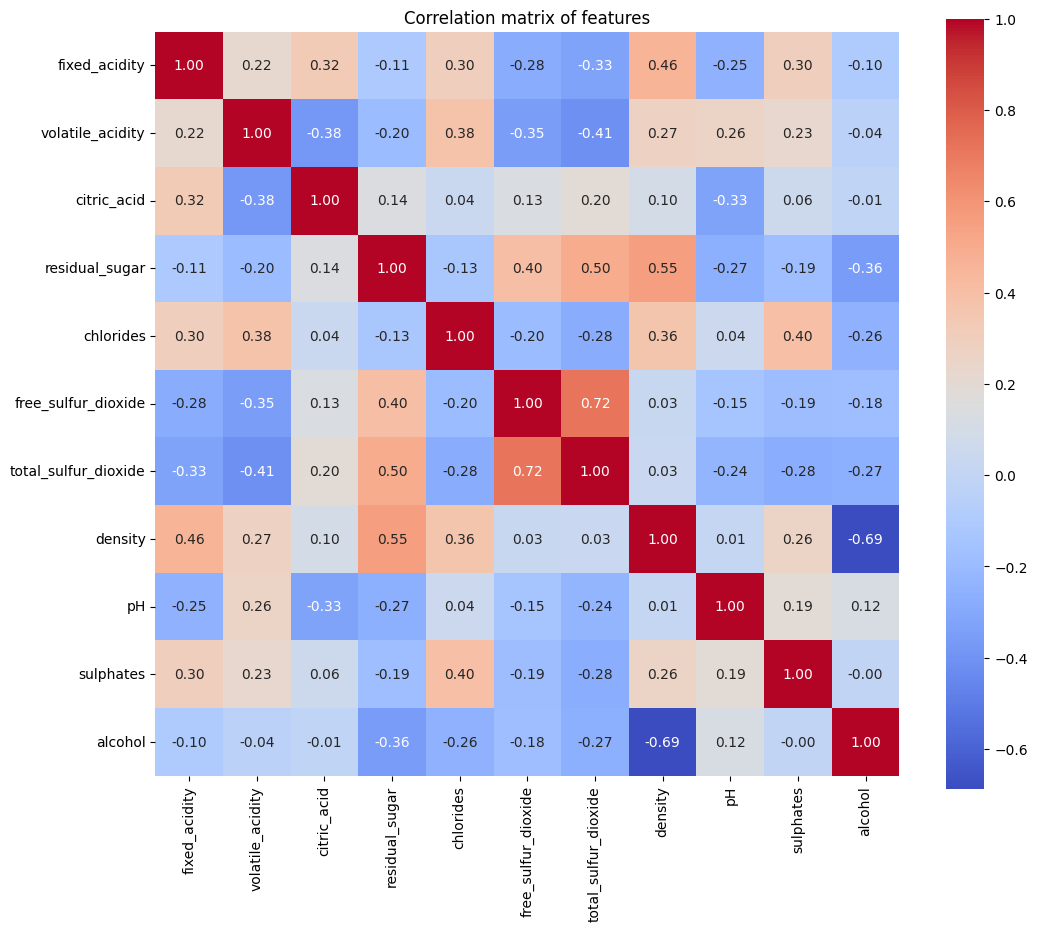

In [14]:
# correlation matrix with heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of features')
plt.show()



## Train Random Forest Model

In [67]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Train on a multi-class task (all classes)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
labels = np.unique(y_train)
rf.fit(X_train.values, y_train.values.ravel())
# Make predictions
y_pred = rf.predict(X_test.values)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=labels, zero_division=0))

Accuracy: 0.68
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.68      0.72      0.70       402
           6       0.66      0.77      0.71       597
           7       0.73      0.55      0.63       215
           8       0.93      0.36      0.52        36
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.53      0.36      0.39      1300
weighted avg       0.69      0.68      0.67      1300



In [66]:
# Remove class 3 and 9 from train and test sets
mask_train = ~y_train['quality'].isin([3, 9])
mask_test = ~y_test['quality'].isin([3, 9])
X_train_filtered = X_train[mask_train]
y_train_filtered = y_train[mask_train]
X_test_filtered = X_test[mask_test]
y_test_filtered = y_test[mask_test]

# Train random forest on the remaining classes
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_filtered.values, y_train_filtered.values.ravel())
# Make predictions
y_pred = rf.predict(X_test_filtered.values)
labels_filtered = np.unique(y_train_filtered)
print("Accuracy:", accuracy_score(y_test_filtered, y_pred))
print(classification_report(y_test_filtered, y_pred, labels=labels_filtered, zero_division=0))

Accuracy: 0.679814385150812
              precision    recall  f1-score   support

           4       0.67      0.14      0.23        43
           5       0.67      0.74      0.70       402
           6       0.68      0.74      0.71       597
           7       0.70      0.56      0.62       215
           8       0.86      0.33      0.48        36

    accuracy                           0.68      1293
   macro avg       0.71      0.50      0.55      1293
weighted avg       0.68      0.68      0.67      1293



In [68]:
mask_train = ~y_train['quality'].isin([3, 4, 8, 9])
mask_test = ~y_test['quality'].isin([3, 4, 8, 9])
X_train_filtered = X_train[mask_train]
y_train_filtered = y_train[mask_train]
X_test_filtered = X_test[mask_test]
y_test_filtered = y_test[mask_test]

# Train random forest on the remaining classes
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_filtered.values, y_train_filtered.values.ravel())
# Make predictions
y_pred = rf.predict(X_test_filtered.values)
labels_filtered = np.unique(y_train_filtered)
print("Accuracy:", accuracy_score(y_test_filtered, y_pred))
print(classification_report(y_test_filtered, y_pred, labels=labels_filtered, zero_division=0))

Accuracy: 0.714168039538715
              precision    recall  f1-score   support

           5       0.71      0.73      0.72       402
           6       0.70      0.75      0.73       597
           7       0.77      0.58      0.66       215

    accuracy                           0.71      1214
   macro avg       0.73      0.69      0.70      1214
weighted avg       0.72      0.71      0.71      1214



## Analysis and Discussion
The first result of the random forest algorithm has 68% accuracy, but if we look closely into the accuracy score for each of the classes. We can see the the algorithm is bad at getting the outlier classes (3 and 9) correct. Thus, I remove them from the dataset and run random forest again. However, the accuracy didn't have that much of different because those outliers onlt account for a tiny portion of the whole data. I further remove another two classes that have the least data, so that only three classes remaining, and there was 3% increase in the accuracy. The accuracy was decent, and comparing to decision tree, it performs better. 